In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/nba-boxscore-season-2023-2024/NBA-BoxScores-2023-2024.csv')

# Display basic statistics for the dataset
df.describe()



,Unnamed: 0,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,14020.000000,1.402000e+04,1.402000e+04,1.402000e+04,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,...,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000,11369.000000
mean,12.825820,2.230030e+07,1.610613e+09,1.326440e+06,3.919694,8.278389,0.435662,1.187703,3.252001,0.264609,...,1.001671,3.044771,4.046442,2.447445,0.692849,0.477087,1.224030,1.831032,10.704635,0.000000
std,7.744957,2.632193e+02,8.602961e+00,5.857758e+05,3.325917,6.148310,0.256061,1.474014,2.996758,0.292859,...,1.378015,2.664672,3.427744,2.634871,0.940031,0.864108,1.382585,1.477738,9.024032,11.533844
min,0.000000,2.230000e+07,1.610613e+09,2.544000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000
25%,6.000000,2.230013e+07,1.610613e+09,1.626204e+06,1.000000,3.000000,0.294000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000
50%,13.000000,2.230026e+07,1.610613e+09,1.629627e+06,3.000000,7.000000,0.455000,1.000000,3.000000,0.222000,...,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,0.000000
75%,19.000000,2.230040e+07,1.610613e+09,1.630573e+06,6.000000,12.000000,0.588000,2.000000,5.000000,0.500000,...,2.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,7.000000
max,29.000000,2.230123e+07,1.610613e+09,1.641936e+06,20.000000,33.000000,1.000000,12.000000,18.000000,1.000000,...,15.000000,20.000000,25.000000,23.000000,7.000000,8.000000,11.000000,6.000000,64.000000,46.000000


In [2]:
# Count the number of unique teams
unique_teams = df['TEAM_ID'].nunique()
print(f"There are {unique_teams} unique teams in the dataset.")


There are 30 unique teams in the dataset.


In [3]:
# Calculate average points per game for each player
avg_pts_per_game = df.groupby('PLAYER_NAME')['PTS'].mean()

# Identify the player with the highest average points per game
highest_avg_pts_player = avg_pts_per_game.idxmax()
print(f"The player with the highest average points per game is {highest_avg_pts_player}.")


The player with the highest average points per game is Joel Embiid.


In [4]:
# Calculate the average field goal percentage for all games
avg_fg_pct = df['FG_PCT'].mean()
print(f"The average field goal percentage for all games is {avg_fg_pct:.2%}.")


The average field goal percentage for all games is 43.57%.


In [5]:
# Calculate average plus-minus per game for each team
avg_plus_minus_per_game = df.groupby('TEAM_ID')['PLUS_MINUS'].mean()

# Identify the team with the highest average plus-minus per game
highest_avg_plus_minus_team = avg_plus_minus_per_game.idxmax()
print(f"The team with the highest average plus-minus per game is {highest_avg_plus_minus_team}.")


The team with the highest average plus-minus per game is 1610612738.


**What is the distribution of points scored (PTS) in the dataset?**

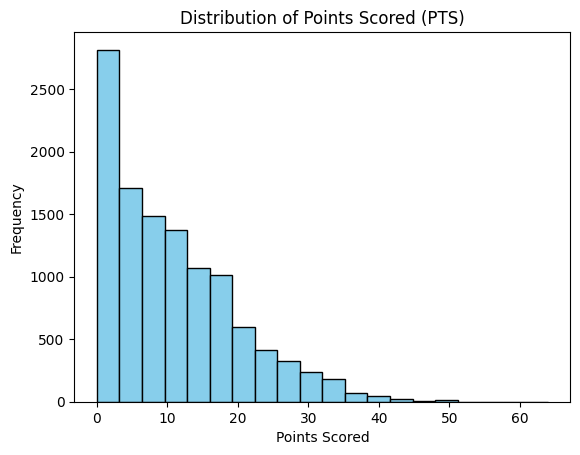

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of points scored
plt.hist(df['PTS'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Points Scored (PTS)')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.show()


**What is the distribution of field goal percentages (FG_PCT) across all games?**

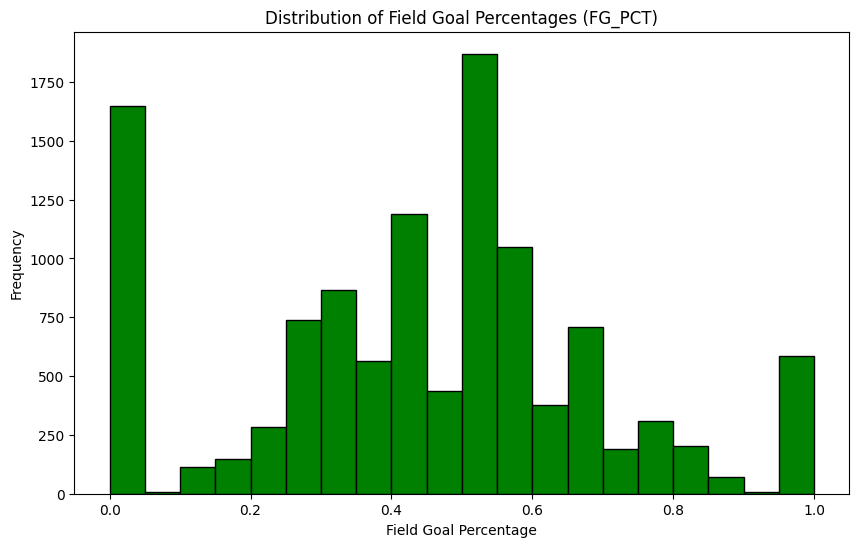

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of field goal percentages
plt.figure(figsize=(10, 6))
plt.hist(df['FG_PCT'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Field Goal Percentages (FG_PCT)')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Frequency')
plt.show()


**Can you visualize the top 10 players with the highest average points per game?**

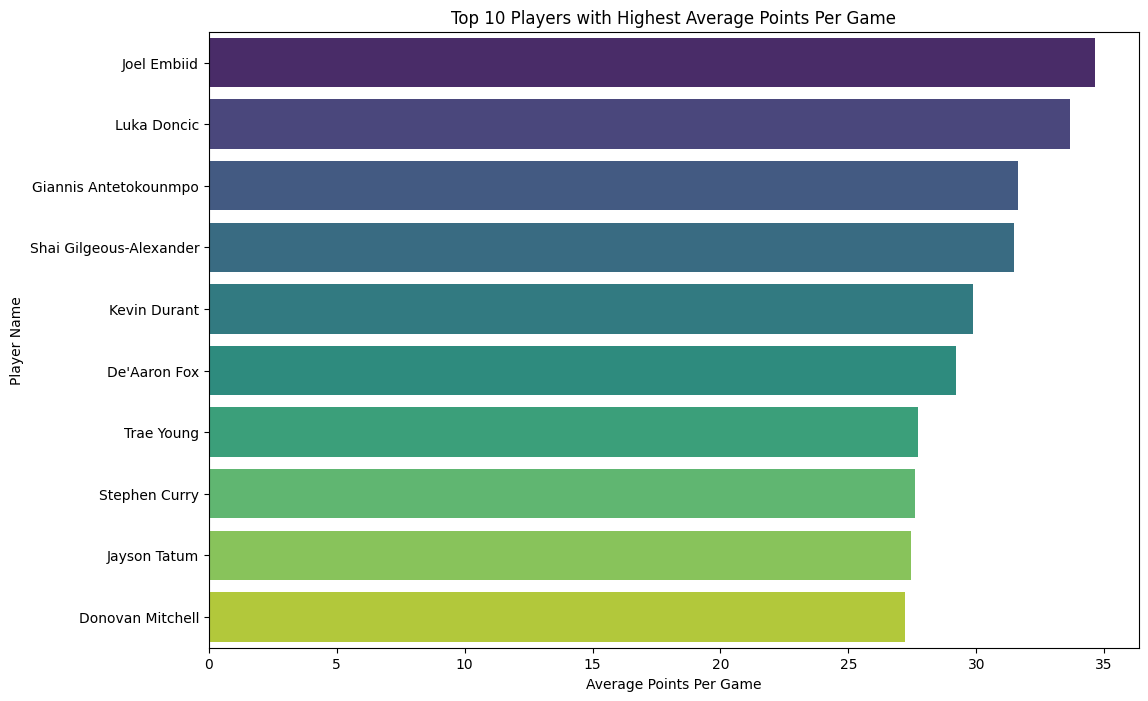

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average points per game for each player
avg_pts_per_game = df.groupby('PLAYER_NAME')['PTS'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 players with the highest average points per game
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_pts_per_game.values, y=avg_pts_per_game.index, palette='viridis')
plt.title('Top 10 Players with Highest Average Points Per Game')
plt.xlabel('Average Points Per Game')
plt.ylabel('Player Name')
plt.show()


**How do the field goal percentages (FG_PCT) vary across different teams?**

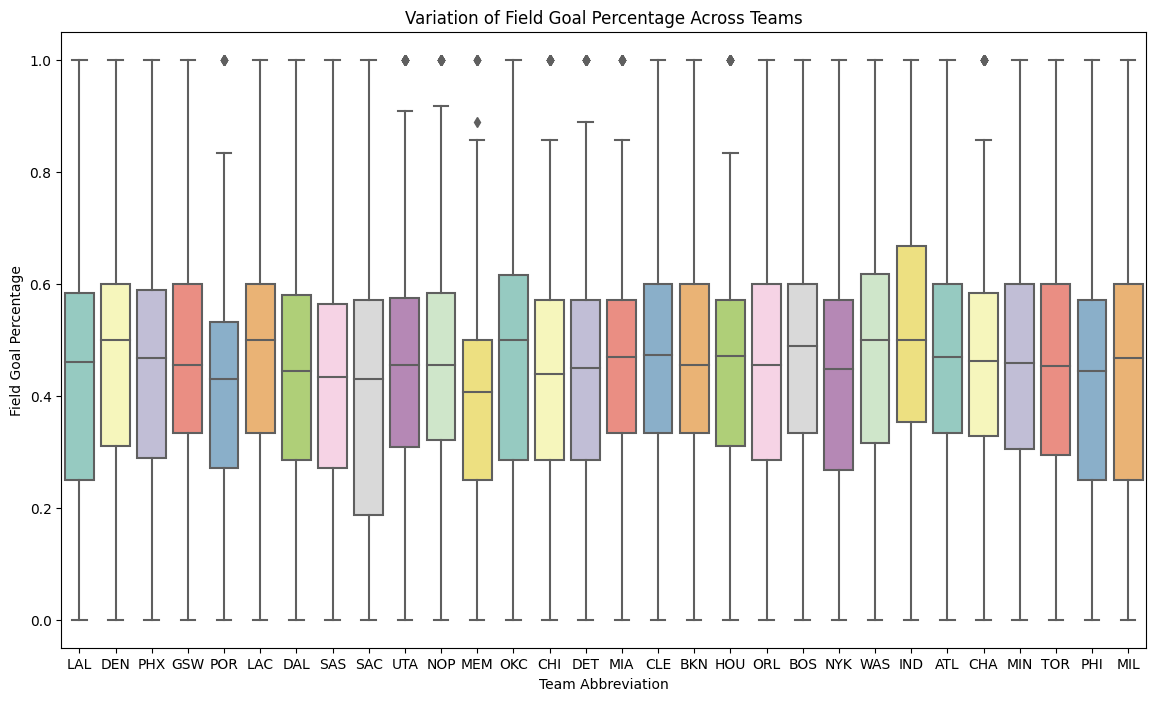

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot to show the distribution of field goal percentages for each team
plt.figure(figsize=(14, 8))
sns.boxplot(x='TEAM_ABBREVIATION', y='FG_PCT', data=df, palette='Set3')
plt.title('Variation of Field Goal Percentage Across Teams')
plt.xlabel('Team Abbreviation')
plt.ylabel('Field Goal Percentage')
plt.show()


**Create a pair plot to visualize the relationships between different statistical metrics**

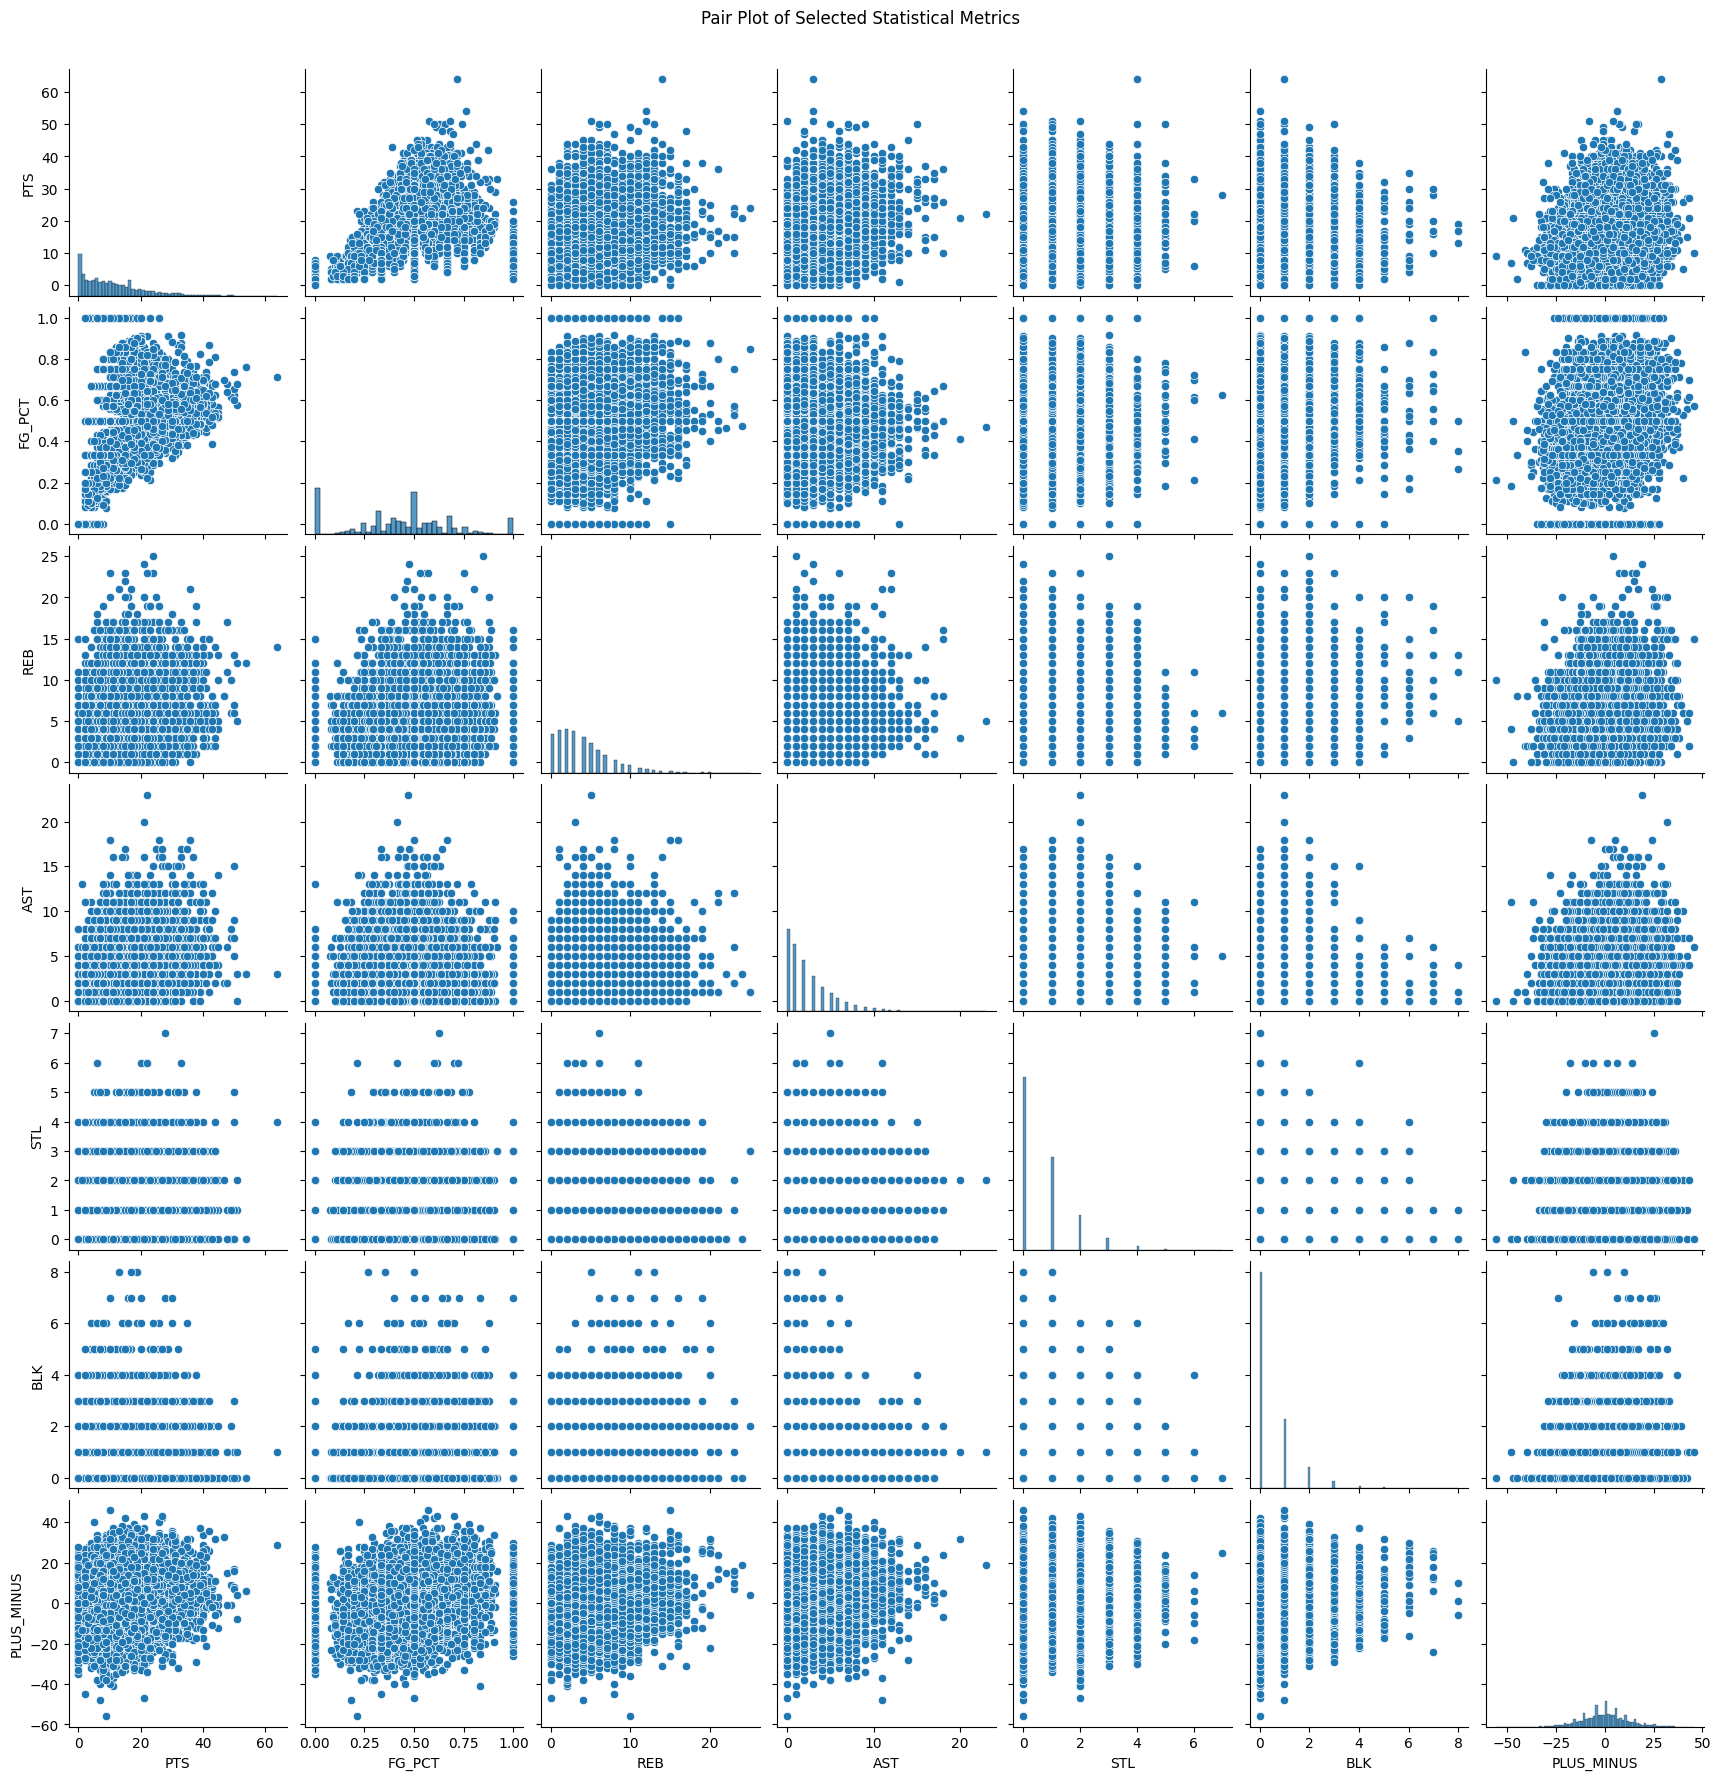

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pair plot
selected_columns = ['PTS', 'FG_PCT', 'REB', 'AST', 'STL', 'BLK', 'PLUS_MINUS']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Statistical Metrics', y=1.02)
plt.show()


**Visualize the distribution of points scored (PTS) by each team.**

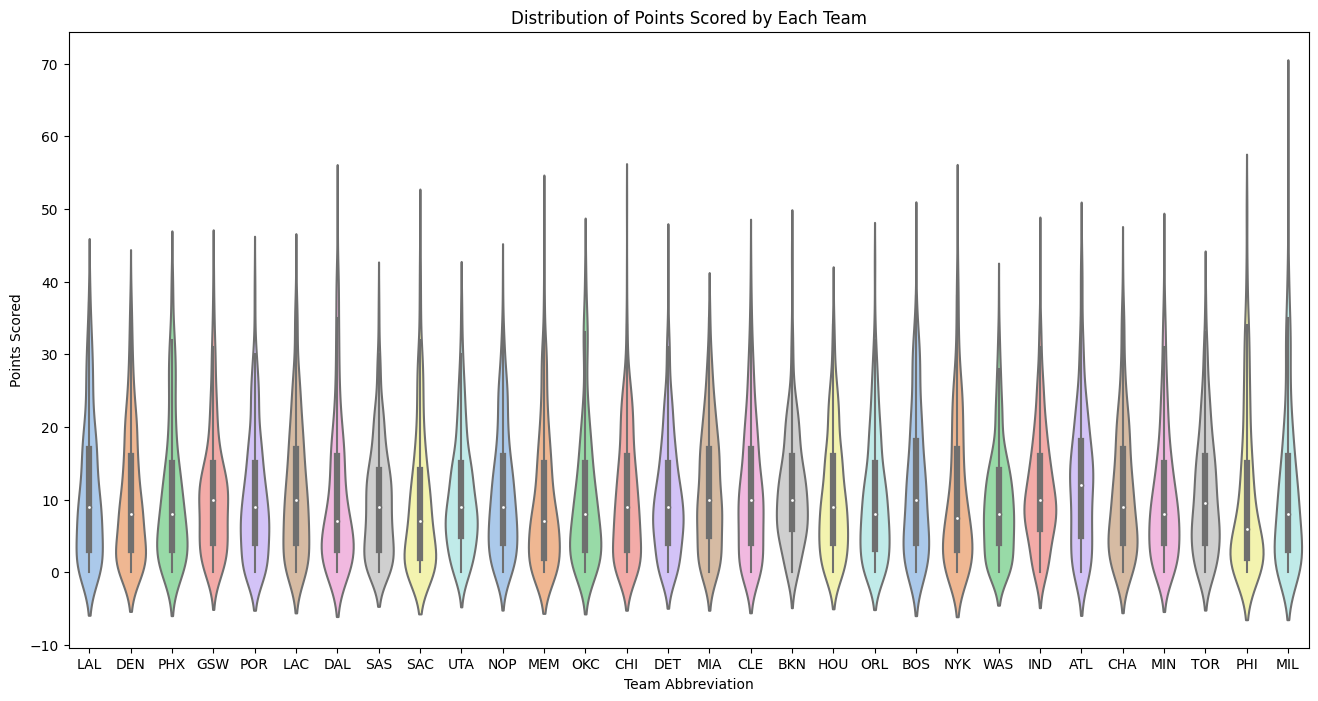

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a violin plot to show the distribution of points scored by each team
plt.figure(figsize=(16, 8))
sns.violinplot(x='TEAM_ABBREVIATION', y='PTS', data=df, palette='pastel')
plt.title('Distribution of Points Scored by Each Team')
plt.xlabel('Team Abbreviation')
plt.ylabel('Points Scored')
plt.show()


**Visualize the correlation matrix of key performance metrics.**

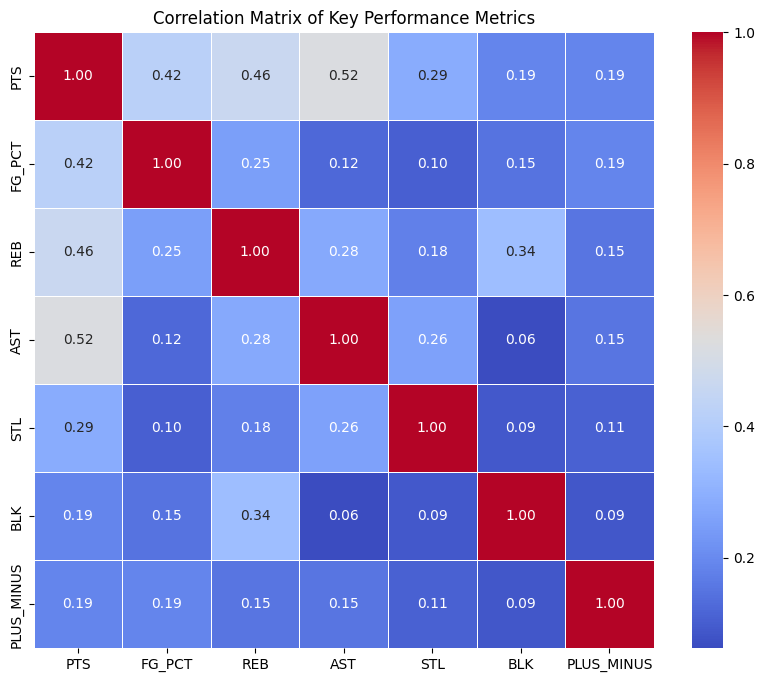

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_columns = ['PTS', 'FG_PCT', 'REB', 'AST', 'STL', 'BLK', 'PLUS_MINUS']

# Create a correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Performance Metrics')
plt.show()


**Visualize the distribution of three-point percentages (FG3_PCT) across all games.**

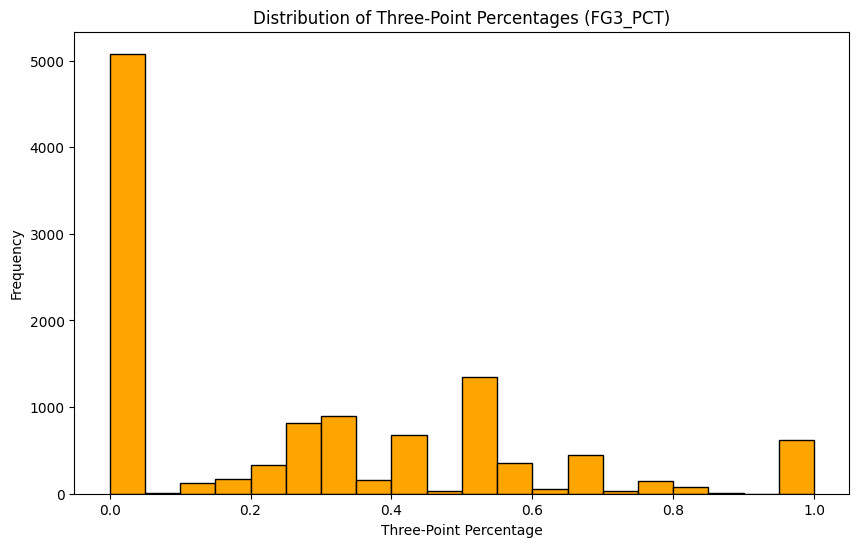

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of three-point percentages
plt.figure(figsize=(10, 6))
plt.hist(df['FG3_PCT'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Three-Point Percentages (FG3_PCT)')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()


**Create a bar chart to show the total points scored by each team throughout the season.**

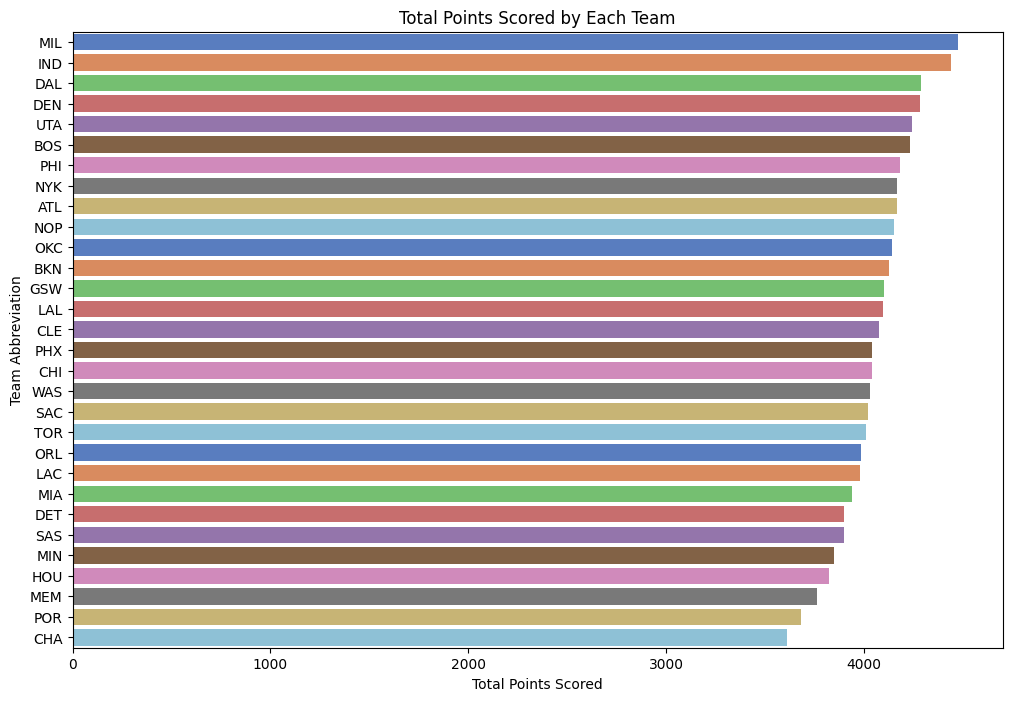

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total points scored by each team
total_points_by_team = df.groupby('TEAM_ABBREVIATION')['PTS'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=total_points_by_team.values, y=total_points_by_team.index, palette='muted')
plt.title('Total Points Scored by Each Team')
plt.xlabel('Total Points Scored')
plt.ylabel('Team Abbreviation')
plt.show()


**Visualize the distribution of assists (AST) and rebounds (REB) for players.**

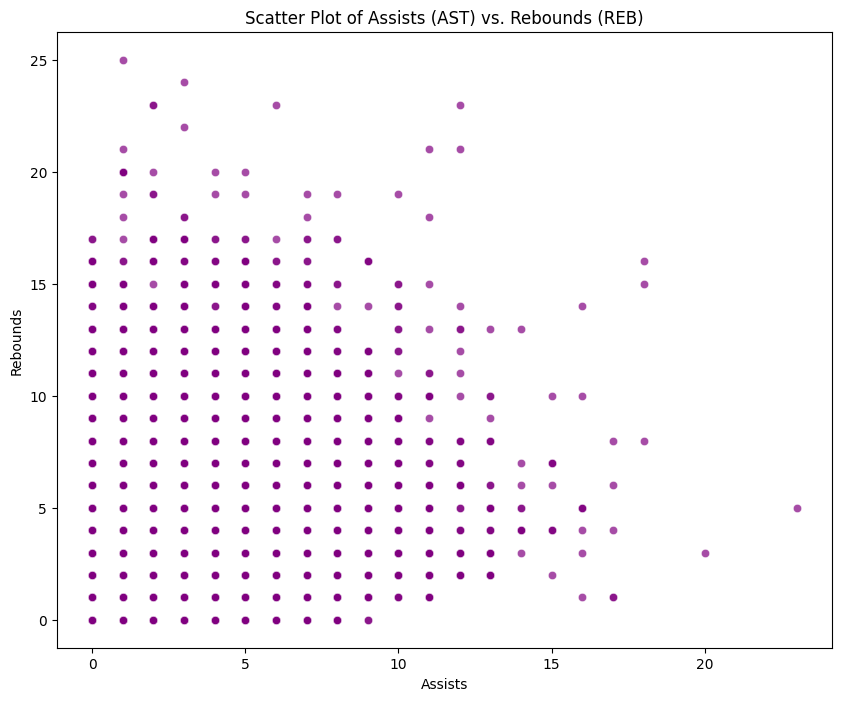

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to show the relationship between assists and rebounds
plt.figure(figsize=(10, 8))
sns.scatterplot(x='AST', y='REB', data=df, color='purple', alpha=0.7)
plt.title('Scatter Plot of Assists (AST) vs. Rebounds (REB)')
plt.xlabel('Assists')
plt.ylabel('Rebounds')
plt.show()


**How do the points scored (PTS) vary for different starting positions?**

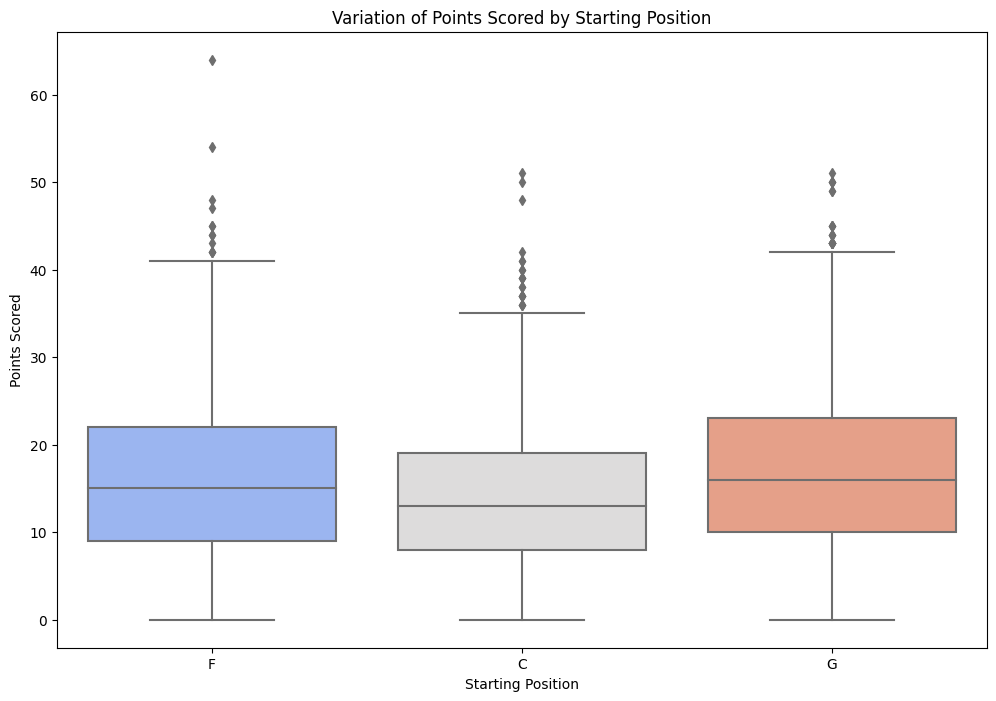

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot to show the distribution of points scored for each starting position
plt.figure(figsize=(12, 8))
sns.boxplot(x='START_POSITION', y='PTS', data=df, palette='coolwarm')
plt.title('Variation of Points Scored by Starting Position')
plt.xlabel('Starting Position')
plt.ylabel('Points Scored')
plt.show()


**Create a bar chart to visualize the total points scored by each player.**

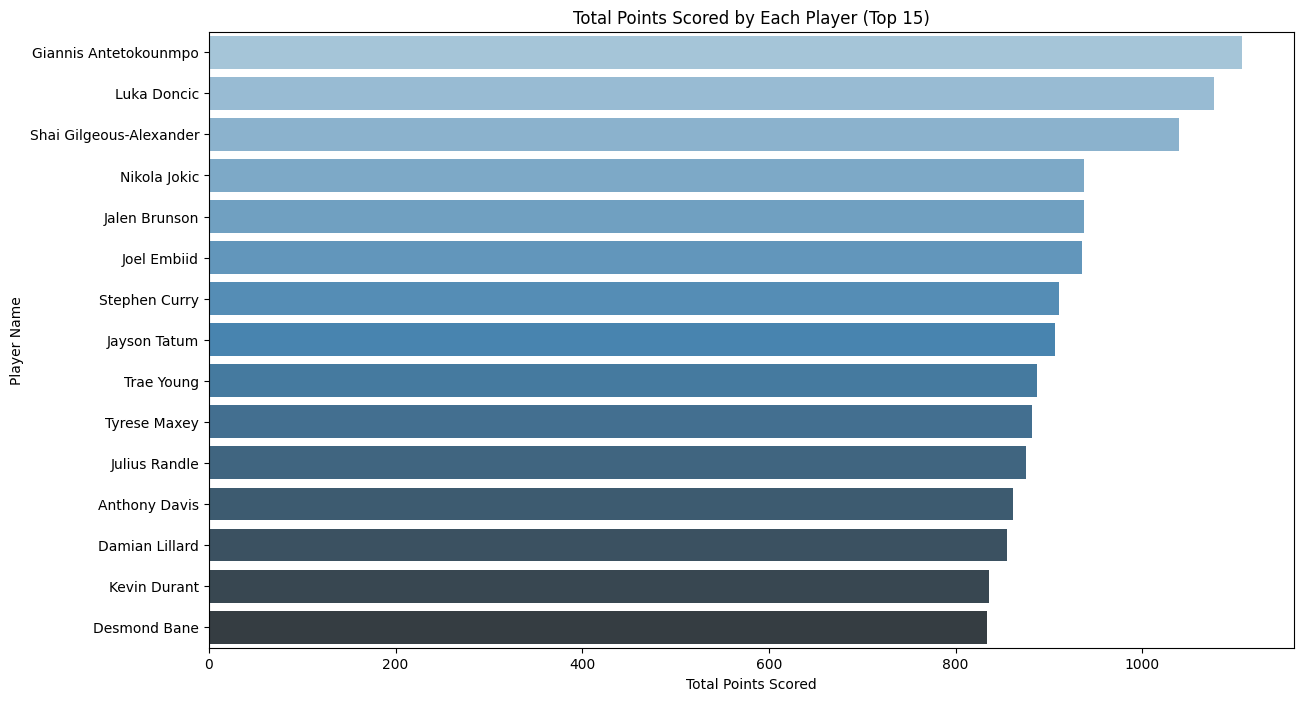

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total points scored by each player
total_points_by_player = df.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).head(15)

# Plot a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=total_points_by_player.values, y=total_points_by_player.index, palette='Blues_d')
plt.title('Total Points Scored by Each Player (Top 15)')
plt.xlabel('Total Points Scored')
plt.ylabel('Player Name')
plt.show()


**Visualize the distribution of free throw percentages (FT_PCT) for all games.**

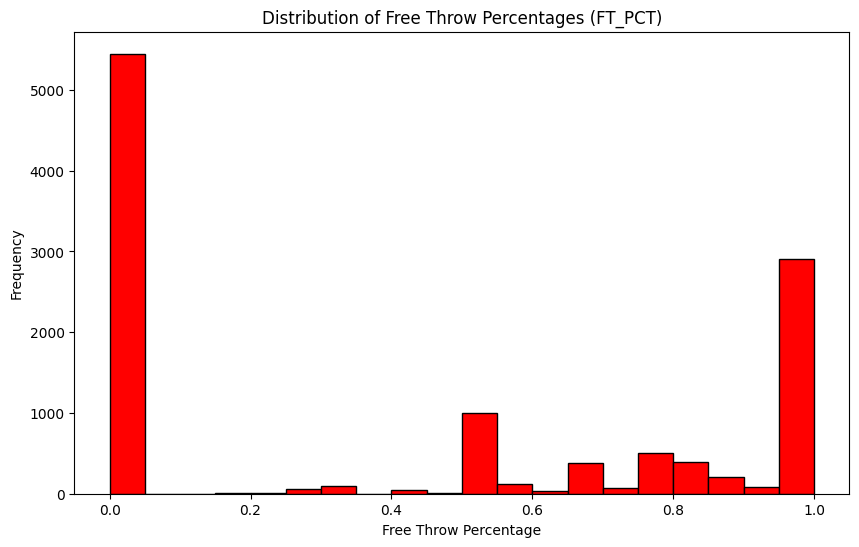

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of free throw percentages
plt.figure(figsize=(10, 6))
plt.hist(df['FT_PCT'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Free Throw Percentages (FT_PCT)')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Frequency')
plt.show()


**Visualize the relationship between field goals made (FGM) and three-pointers made (FG3M).**

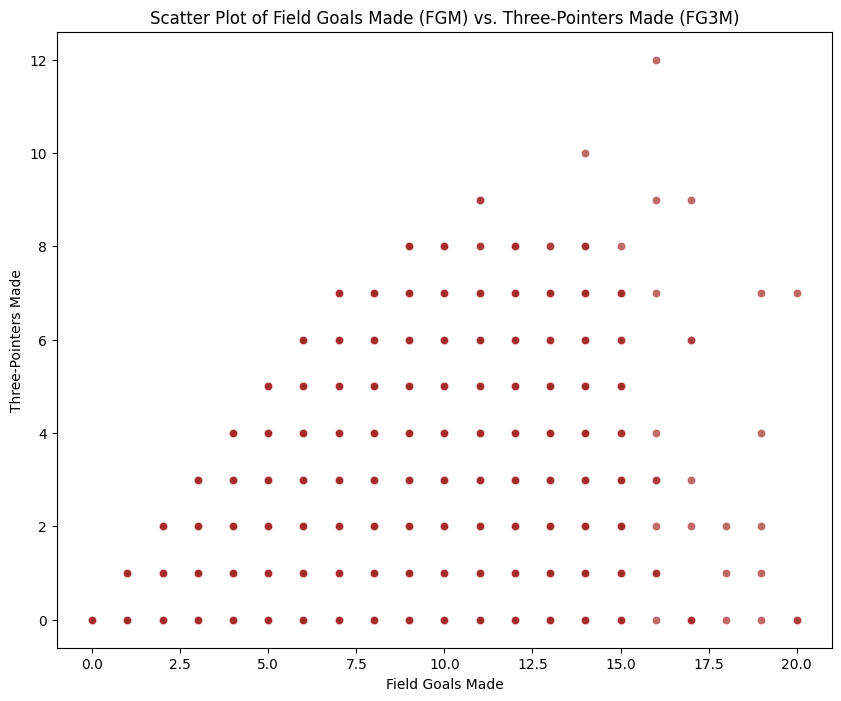

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to show the relationship between field goals made and three-pointers made
plt.figure(figsize=(10, 8))
sns.scatterplot(x='FGM', y='FG3M', data=df, color='brown', alpha=0.7)
plt.title('Scatter Plot of Field Goals Made (FGM) vs. Three-Pointers Made (FG3M)')
plt.xlabel('Field Goals Made')
plt.ylabel('Three-Pointers Made')
plt.show()


**How do the steals (STL) and blocks (BLK) vary for different teams?**

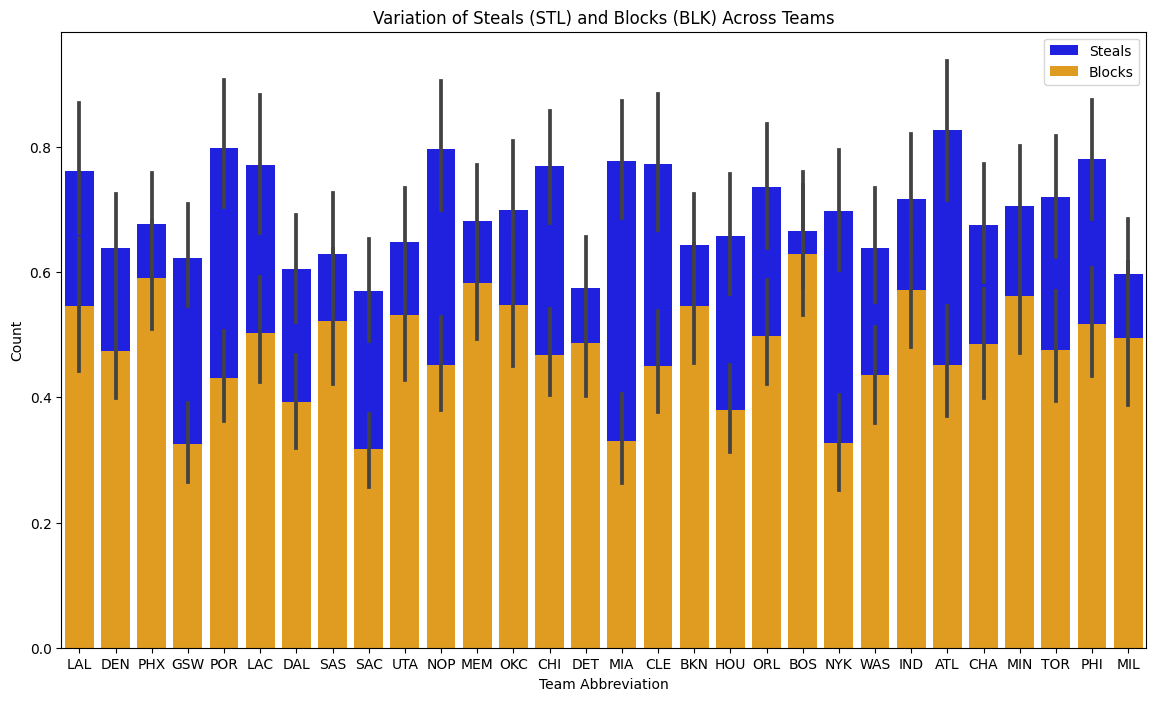

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart to show the variation of steals and blocks for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='TEAM_ABBREVIATION', y='STL', data=df, color='blue', label='Steals')
sns.barplot(x='TEAM_ABBREVIATION', y='BLK', data=df, color='orange', label='Blocks')
plt.title('Variation of Steals (STL) and Blocks (BLK) Across Teams')
plt.xlabel('Team Abbreviation')
plt.ylabel('Count')
plt.legend()
plt.show()


**Create a line chart to track the plus-minus (PLUS_MINUS) for a specific team over the course of the season.**

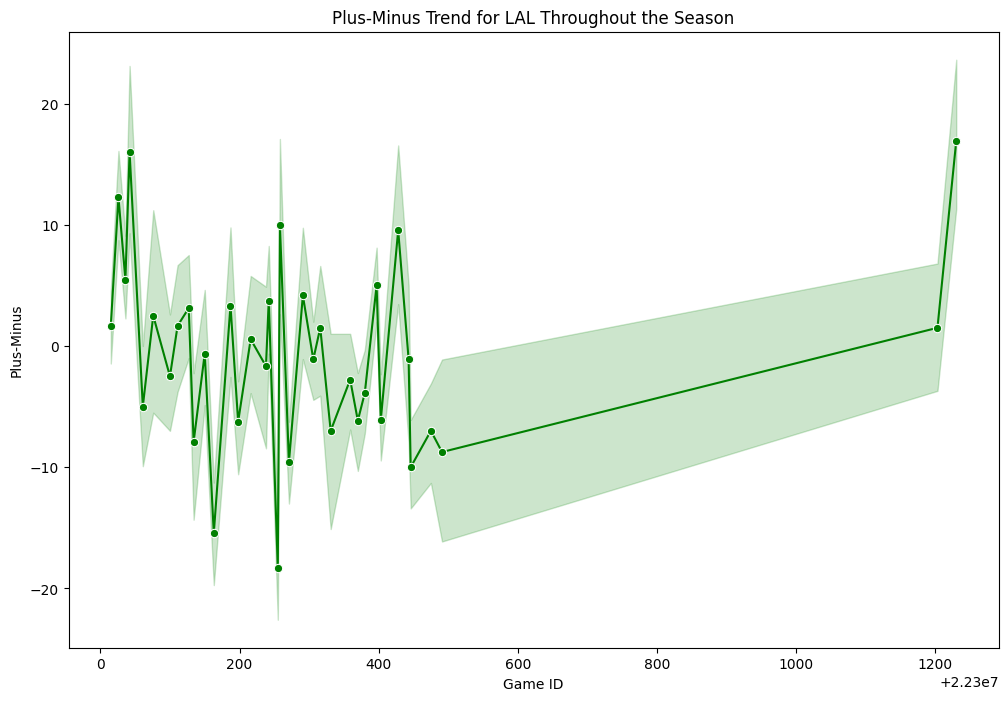

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a specific team for analysis
team_to_plot = 'LAL'

# Filter data for the selected team
team_data = df[df['TEAM_ABBREVIATION'] == team_to_plot]

# Create a line chart to track plus-minus over the season
plt.figure(figsize=(12, 8))
sns.lineplot(x='GAME_ID', y='PLUS_MINUS', data=team_data, marker='o', color='green')
plt.title(f'Plus-Minus Trend for {team_to_plot} Throughout the Season')
plt.xlabel('Game ID')
plt.ylabel('Plus-Minus')
plt.show()


**Visualize the distribution of field goals made (FGM) by starting position.**

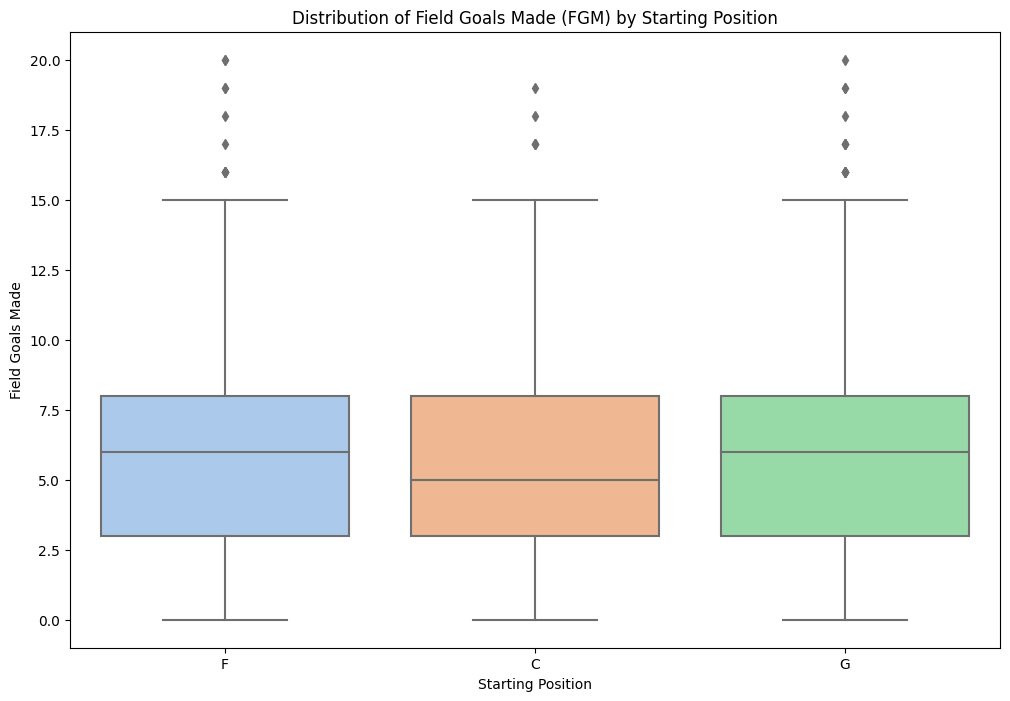

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot to show the distribution of field goals made by starting position
plt.figure(figsize=(12, 8))
sns.boxplot(x='START_POSITION', y='FGM', data=df, palette='pastel')
plt.title('Distribution of Field Goals Made (FGM) by Starting Position')
plt.xlabel('Starting Position')
plt.ylabel('Field Goals Made')
plt.show()


**Visualize the distribution of rebounds (REB) by each team, highlighting the top 3 rebounding teams.**

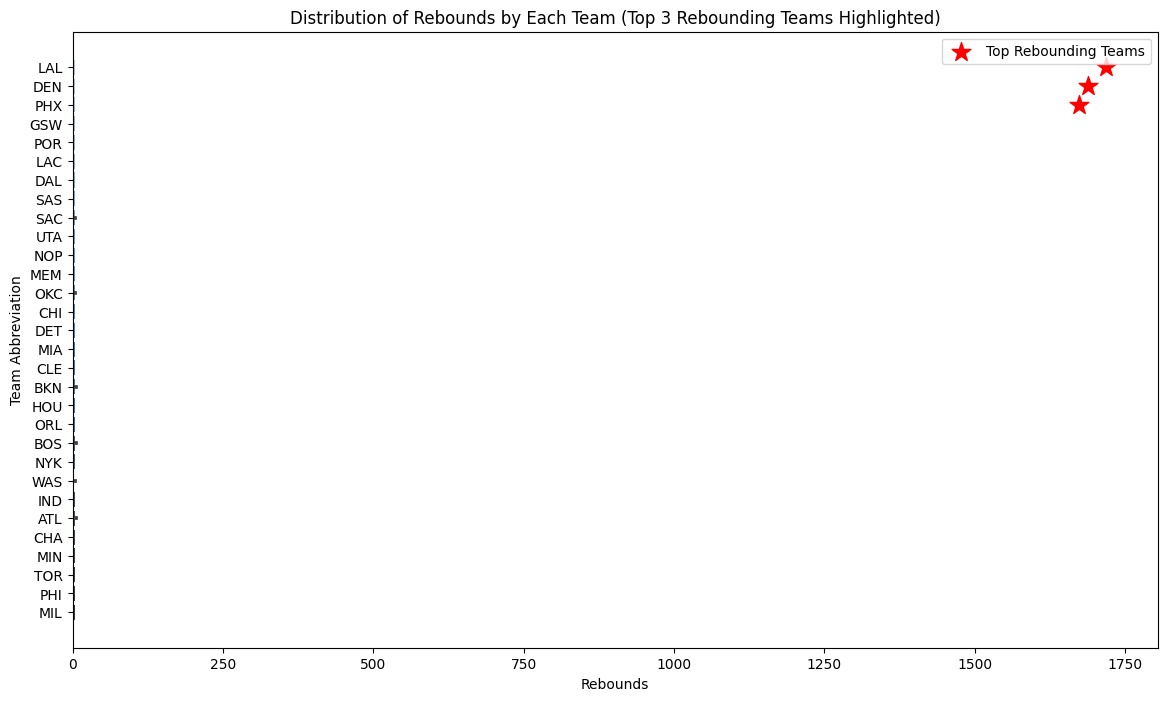

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the top 3 rebounding teams
top_rebounding_teams = df.groupby('TEAM_ABBREVIATION')['REB'].sum().sort_values(ascending=False).head(3)

# Create a bar chart to show the distribution of rebounds by each team, highlighting the top 3 rebounding teams
plt.figure(figsize=(14, 8))
sns.barplot(x='REB', y='TEAM_ABBREVIATION', data=df, palette='Blues_d')
plt.scatter(top_rebounding_teams.values, top_rebounding_teams.index, color='red', marker='*', s=200, label='Top Rebounding Teams')
plt.title('Distribution of Rebounds by Each Team (Top 3 Rebounding Teams Highlighted)')
plt.xlabel('Rebounds')
plt.ylabel('Team Abbreviation')
plt.legend()
plt.show()


**Visualize the distribution of steals (STL) and blocks (BLK) for players by position.**

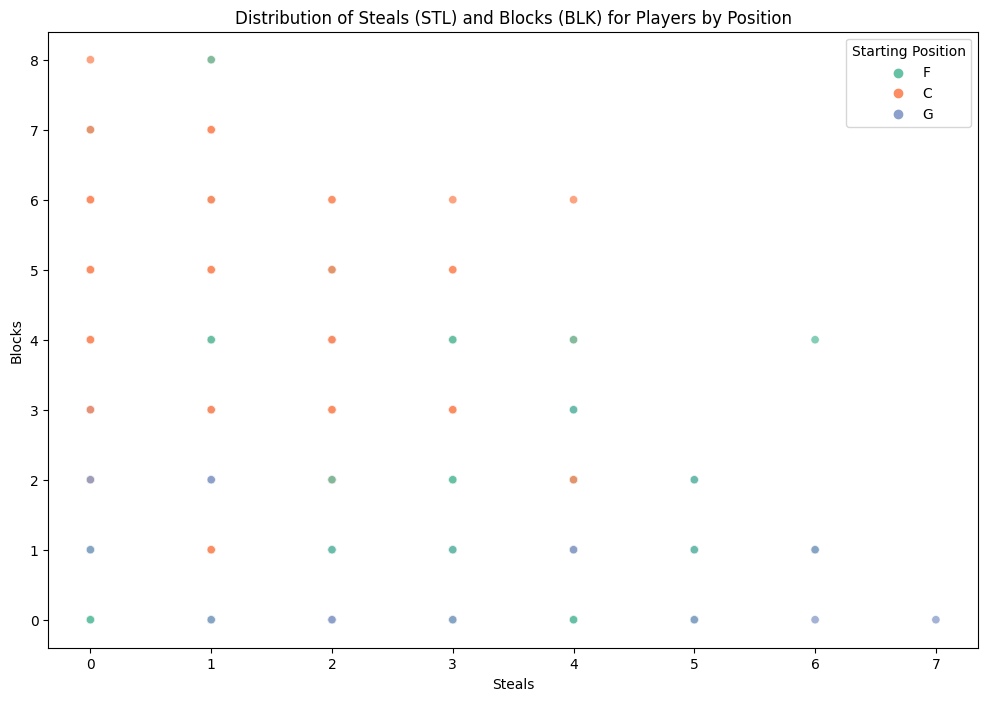

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to show the distribution of steals and blocks for players by position
plt.figure(figsize=(12, 8))
sns.scatterplot(x='STL', y='BLK', hue='START_POSITION', data=df, palette='Set2', alpha=0.8)
plt.title('Distribution of Steals (STL) and Blocks (BLK) for Players by Position')
plt.xlabel('Steals')
plt.ylabel('Blocks')
plt.legend(title='Starting Position')
plt.show()


**Create a radar chart to compare the overall performance of different teams based on key performance metrics.**

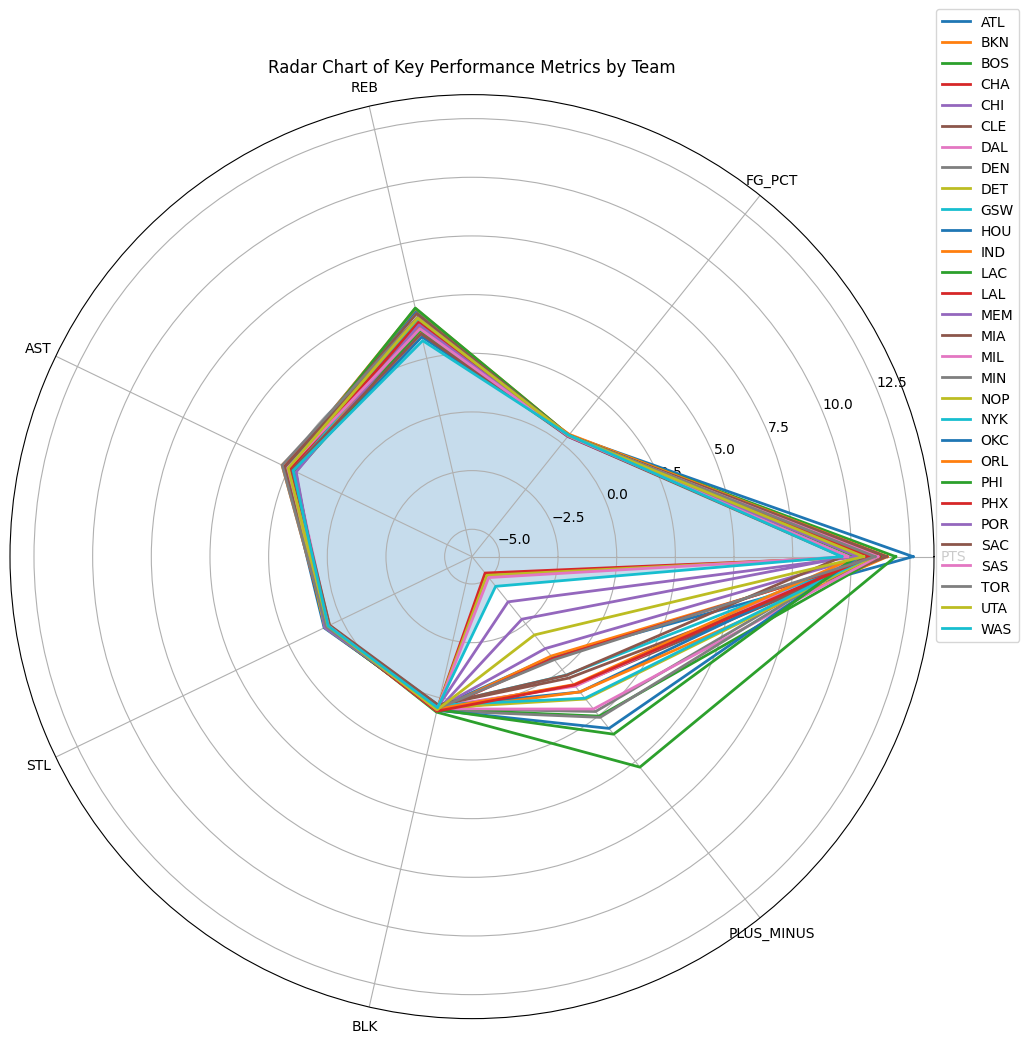

In [25]:
import matplotlib.pyplot as plt
from math import pi

# Select relevant columns for the radar chart
radar_columns = ['PTS', 'FG_PCT', 'REB', 'AST', 'STL', 'BLK', 'PLUS_MINUS']

# Calculate the mean values for each metric by team
team_avg_metrics = df.groupby('TEAM_ABBREVIATION')[radar_columns].mean().reset_index()

# Number of variables for the radar chart
num_vars = len(radar_columns)

# Calculate angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot radar chart for each team
plt.figure(figsize=(12, 12))
for i, team in enumerate(team_avg_metrics['TEAM_ABBREVIATION']):
    values = team_avg_metrics.loc[i, radar_columns].values
    values = list(values)
    values += values[:1]

    # Plot the line
    plt.polar(angles, values, linewidth=2, linestyle='solid', label=team)

# Fill area under the lines
plt.fill(angles, values, alpha=0.25)

# Add labels, title, and legend
plt.xticks(angles[:-1], radar_columns)
plt.title('Radar Chart of Key Performance Metrics by Team')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
